In [38]:
# SHAP

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


import shap

In [40]:
dataset = pd.read_csv("/Users/benya/OneDrive/Desktop/BADM453/winequality-white.csv", sep = ';')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [41]:
# Baseline RF regressor model

X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # test_size = 0.3 means its 30%

rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.6595198212016248


In [42]:
# R-SQUARED

model_score = rfr.score(X_train, y_train) 
print('R^2:', model_score)

# FEATURES EXPLAIN THE OUTCOME TOO WELL, THIS IS A SIGN OF OVER-FITTING
# IF NEEDED, CHECK R-SQUARED FOR TESTING SET, TOO. 

R^2: 0.9326276253166297


In [43]:
importances = rfr.feature_importances_

In [44]:
importances

array([0.05636226, 0.12909652, 0.05566176, 0.06480615, 0.06450229,
       0.11474377, 0.06636067, 0.05716977, 0.07116287, 0.0624044 ,
       0.25772954])

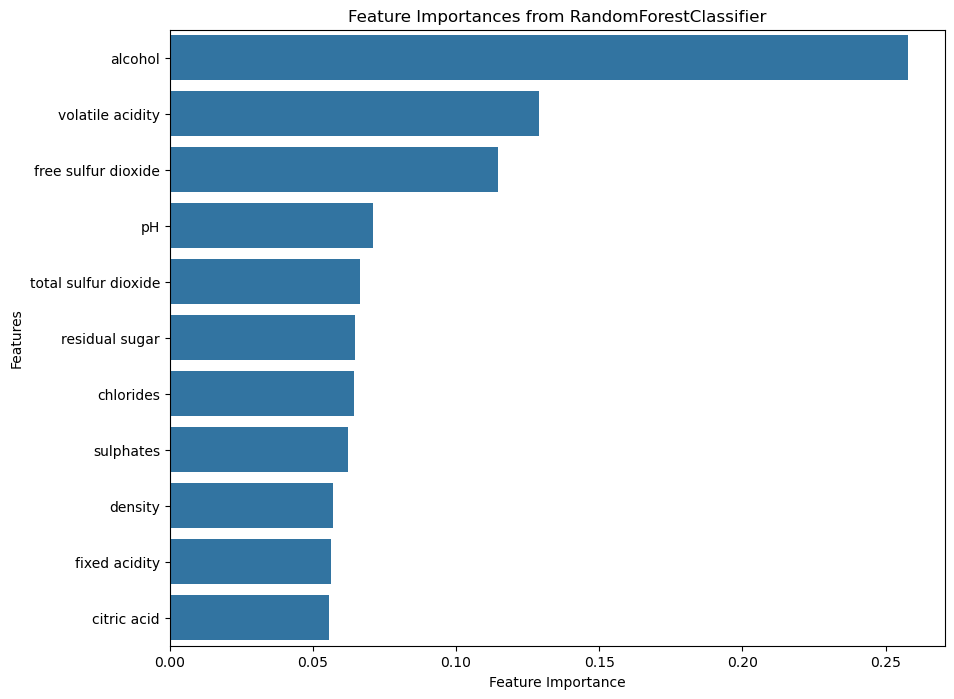

In [45]:
# Convert to a Series for easy plotting
importances_series = pd.Series(importances, index=X.columns)

# Sort the features by their importance
sorted_importances = importances_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)

# Add labels and title for clarity
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from RandomForestClassifier')

# Show the plot
plt.show()

In [46]:
shap.initjs()

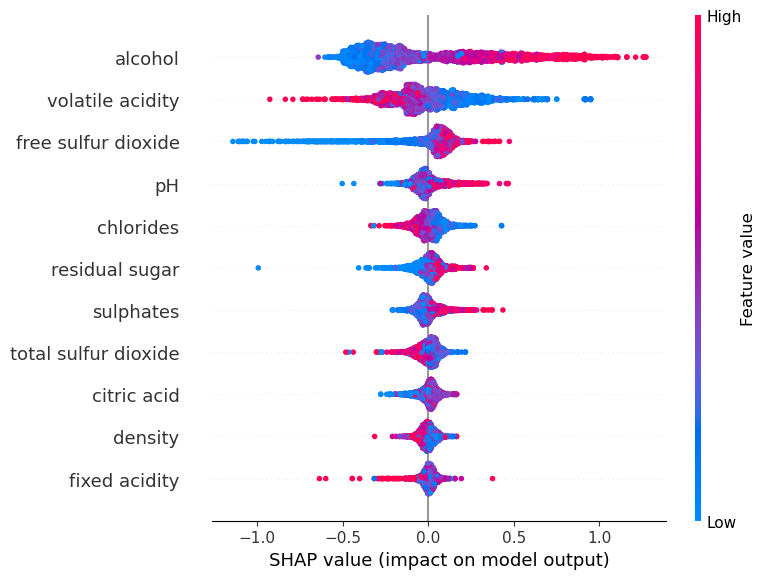

In [47]:
# SHAP 


X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # test_size = 0.3 means its 30%

# Train the Random Forest Regressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Create a SHAP explainer instance. This instance will compute SHAP values for each feature
explainer = shap.TreeExplainer(rfr)

# Calculate SHAP values for the TRAIN set --> to understand how model makes "decisions" in training
shap_values = explainer.shap_values(X_train)

# Create a summary plot
shap.summary_plot(shap_values, X_train)


In [48]:
# Two most infuential features that drive quality score up: ALCOHOL and VOLATILE ACIDITY (negative correlation)
# Two most infuential features that drive quality score down: FREE SULFUR DIOXIDE and VOLATILE ACIDITY

# PROFILE OF WINE TO BE AVOIDED:
# WINES LOW ON ALCOHOL, HIGH ON VOLATILE ACIDITY, LOW ON FREE SULFUR DIOXIDE, LOW ON PH (STUDENTS SHOULD MENTION 3-4 CAHACTERISTIS MINIMUM)


# Refere to the following link for more details about graph: https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values

In [49]:
# SHAP (LOCAL ANALYSIS SET UP)

explainer = shap.TreeExplainer(rfr) #feature_names = X.columns
shap_values = explainer(X_test) # MUST BE VALIDATION

In [50]:
shap.plots.force(shap_values[3])


In [62]:
shap.plots.force(shap_values[13])

In [51]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1
...,...,...,...,...,...,...,...,...,...,...,...
934,6.2,0.28,0.43,13.00,0.039,64.0,233.0,0.99745,3.08,0.38,8.9
2803,5.5,0.15,0.32,14.00,0.031,16.0,99.0,0.99437,3.26,0.38,11.5
3364,6.0,0.20,0.26,1.10,0.033,38.0,67.0,0.98954,3.14,0.38,11.5
3870,6.1,0.23,0.27,9.80,0.055,74.0,134.0,0.99534,3.16,0.40,10.2


In [52]:
y_test

2762    5
42      6
1419    7
3664    8
2125    5
       ..
934     5
2803    8
3364    6
3870    6
3677    6
Name: quality, Length: 1470, dtype: int64

In [53]:
import pandas as pd

# Assuming X_test is your pandas DataFrame
X_test['Row Number'] = range(len(X_test))  # Add a column for row numbers starting from 0

# Reorder the columns to make 'Row Number' the first column
X_test = X_test[['Row Number'] + [col for col in X_test.columns if col != 'Row Number']]

# Display the DataFrame
print(X_test)


      Row Number  fixed acidity  volatile acidity  citric acid  \
2762           0            7.3              0.32         0.35   
42             1            7.0              0.31         0.26   
1419           2            7.6              0.14         0.74   
3664           3            5.0              0.29         0.54   
2125           4            6.0              0.28         0.22   
...          ...            ...               ...          ...   
934         1465            6.2              0.28         0.43   
2803        1466            5.5              0.15         0.32   
3364        1467            6.0              0.20         0.26   
3870        1468            6.1              0.23         0.27   
3677        1469            6.9              0.58         0.58   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
2762            1.40      0.050                  8.0                 163.0   
42              7.40      0.069                 28.

In [54]:
df = pd.read_csv('/Users/kiton/Documents/BADM453/Test 2/Test2.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kiton/Documents/BADM453/Test 2/Test2.csv'

In [ ]:
# Logit baseline

y = df['biopsy']
X = df[['age','numberofsexualpartners','firstsexualintercourse','numofpregnancies','smokes','smokesyears','smokespacksyear','hormonalcontraceptives','hormonalcontraceptivesyears','iud','iudyears','stds','stdsnumber','stdsnumberofdiagnosis','dxcancer','dxcin','dxhpv','dx','hinselmann','schiller','citology']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 0) # random sample

logit = LogisticRegression(max_iter = 500)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_val)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

In [ ]:
# Hard way

# Get the coefficients from the trained logistic regression model
coefficients = logit.coef_[0]

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort features by importance (absolute value of the coefficient)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importance
print(feature_importance[['Feature', 'Coefficient']])


In [ ]:
# Random Forest

y = df['biopsy']
X = df[['age','numberofsexualpartners','firstsexualintercourse','numofpregnancies','smokes','smokesyears','smokespacksyear','hormonalcontraceptives','hormonalcontraceptivesyears','iud','iudyears','stds','stdsnumber','stdsnumberofdiagnosis','dxcancer','dxcin','dxhpv','dx','hinselmann','schiller','citology']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 0)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

In [ ]:
importances = rfc.feature_importances_

In [ ]:
importances

In [ ]:
# Convert to a Series for easy plotting
importances_series = pd.Series(importances, index=X.columns)

# Sort the features by their importance
sorted_importances = importances_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)

# Add labels and title for clarity
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from RandomForestClassifier')

# Show the plot
plt.show()

In [ ]:
shap.initjs()

In [ ]:
# SHAP Classification

y = df['biopsy']
X = df[['age','numberofsexualpartners','firstsexualintercourse','numofpregnancies','smokes','smokesyears','smokespacksyear','hormonalcontraceptives','hormonalcontraceptivesyears','iud','iudyears','stds','stdsnumber','stdsnumberofdiagnosis','dxcancer','dxcin','dxhpv','dx','hinselmann','schiller','citology']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 0) # random sample

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

# Create a SHAP explainer instance. This instance will compute SHAP values for each feature
explainer = shap.TreeExplainer(rfc)

# Calculate SHAP values for the TRAIN set -- > to understand how model makes "decisions" in training
# Alternatively you can do that for VALIDATION --> to understand how model makes "decision" for testing samples
shap_values = explainer.shap_values(X_train)

# Create a summary plot
# shap_values[1] refers to the SHAP values for the positive class (class 1)
shap.summary_plot(shap_values[1], X_train)

# This is known as GLOBAL analysis, which aims to tell you which factors are imprtant

In [ ]:
# Now, let's assume we want to understand WHY a given patient was predicted 0 or 1

In [ ]:
# Imagine, we have a patient in VALIDATION set (like it's a new patient)

# For example, say, that patient is in row 10
# Let's check their true class
true_class = y_val.iloc[71]
print(f"True Class: {true_class}")


In [ ]:
# Let's check their predicted class

predicted_class = y_pred[71]
print(f"Predicted Class: {predicted_class}")


In [ ]:
# Now, let's understand which factors led to a decision for a given patient

# The shap.plots.force function generates a force plot, which provides a detailed visualization of how individual features contribute to a single prediction.

# expected_value[1] -- we want to understand factors that lead to 1 (cancer)
# shap_values[1][5] -- first number must match number of expected_value, second number is the patient row
# X_val.iloc[10, :] -- number must match patient row

shap.plots.force(explainer.expected_value[1], shap_values[1][70], X_val.iloc[70, :], matplotlib=True)
